# EDA: LIDC-IDRI

# 1) metadata.csv

In [2]:
from glob import glob
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("../preprocess/metadata.csv")
df[:5]

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.141365756818...,LIDC-IDRI,NaN,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,LIDC-IDRI-0001,1.3.6.1.4.1.14519.5.2.1.6279.6001.175012972118...,NaN,01-01-2000,NaN,GE MEDICAL SYSTEMS,DX,Digital X-Ray Image Storage - For Presentation,1.2.840.10008.5.1.4.1.1.1.1,2,16.36 MB,.\LIDC-IDRI\LIDC-IDRI-0001\01-01-2000-NA-NA-35...,2022-01-07T21:31:00.297
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.493562949900...,LIDC-IDRI,NaN,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,LIDC-IDRI-0002,1.3.6.1.4.1.14519.5.2.1.6279.6001.116951808801...,NaN,01-01-2000,NaN,GE MEDICAL SYSTEMS,DX,Digital X-Ray Image Storage - For Presentation,1.2.840.10008.5.1.4.1.1.1.1,1,6.91 MB,.\LIDC-IDRI\LIDC-IDRI-0002\01-01-2000-NA-NA-26...,2022-01-07T21:31:02.417
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636...,LIDC-IDRI,NaN,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,LIDC-IDRI-0001,1.3.6.1.4.1.14519.5.2.1.6279.6001.298806137288...,NaN,01-01-2000,NaN,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,133,70.33 MB,.\LIDC-IDRI\LIDC-IDRI-0001\01-01-2000-NA-NA-30...,2022-01-07T21:31:56.689
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.170706757615...,LIDC-IDRI,NaN,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,LIDC-IDRI-0003,1.3.6.1.4.1.14519.5.2.1.6279.6001.101370605276...,NaN,01-01-2000,NaN,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,140,74.11 MB,.\LIDC-IDRI\LIDC-IDRI-0003\01-01-2000-NA-NA-94...,2022-01-07T21:32:06.991
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.142026812390...,LIDC-IDRI,NaN,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,LIDC-IDRI-0003,1.3.6.1.4.1.14519.5.2.1.6279.6001.202063331127...,NaN,01-01-2000,NaN,GE MEDICAL SYSTEMS,DX,Digital X-Ray Image Storage - For Presentation,1.2.840.10008.5.1.4.1.1.1.1,5,38.59 MB,.\LIDC-IDRI\LIDC-IDRI-0003\01-01-2000-NA-NA-59...,2022-01-07T21:32:36.348


In [6]:
df["Series UID"].value_counts()[:5]

1.3.6.1.4.1.14519.5.2.1.6279.6001.152684536713461901635595118048    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.277008819284134153270739862838    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.254176853278710432756285662989    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.241083615484551649610616348856    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.318165737094336595335967914048    1
Name: Series UID, dtype: int64

In [8]:
df["Subject ID"].value_counts()[:10]

LIDC-IDRI-0151    3
LIDC-IDRI-0132    3
LIDC-IDRI-0159    2
LIDC-IDRI-0064    2
LIDC-IDRI-0252    2
LIDC-IDRI-0113    2
LIDC-IDRI-0289    2
LIDC-IDRI-0268    2
LIDC-IDRI-0273    2
LIDC-IDRI-0011    2
Name: Subject ID, dtype: int64

## If you see Number of Images, Scanogram or dose info are included

In [9]:
df["Number of Images"].value_counts()[:10]

2      163
1       91
133     69
4       29
127     22
238     14
139     13
117     13
123     13
280     12
Name: Number of Images, dtype: int64

<AxesSubplot:>

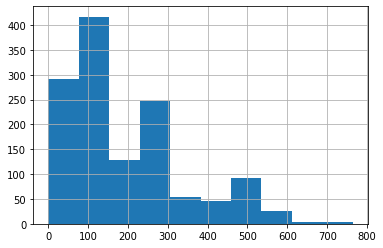

In [26]:
df["Number of Images"].hist()

## Use Number of Images or SOP Class UID -> select only CT series

In [123]:
df["SOP Class UID"].value_counts()

1.2.840.10008.5.1.4.1.1.2      1018
1.2.840.10008.5.1.4.1.1.1.1     237
1.2.840.10008.5.1.4.1.1.1        53
Name: SOP Class UID, dtype: int64

In [11]:
df_case = df[df["Number of Images"] > 10].reset_index(drop=True)

In [14]:
df_case["SOP Class UID"]

0       1.2.840.10008.5.1.4.1.1.2
1       1.2.840.10008.5.1.4.1.1.2
2       1.2.840.10008.5.1.4.1.1.2
3       1.2.840.10008.5.1.4.1.1.2
4       1.2.840.10008.5.1.4.1.1.2
                  ...            
1013    1.2.840.10008.5.1.4.1.1.2
1014    1.2.840.10008.5.1.4.1.1.2
1015    1.2.840.10008.5.1.4.1.1.2
1016    1.2.840.10008.5.1.4.1.1.2
1017    1.2.840.10008.5.1.4.1.1.2
Name: SOP Class UID, Length: 1018, dtype: object

In [15]:
df_case["Subject ID"].value_counts()

LIDC-IDRI-0365    2
LIDC-IDRI-0332    2
LIDC-IDRI-0442    2
LIDC-IDRI-0315    2
LIDC-IDRI-0151    2
                 ..
LIDC-IDRI-0584    1
LIDC-IDRI-0086    1
LIDC-IDRI-0257    1
LIDC-IDRI-0080    1
LIDC-IDRI-0595    1
Name: Subject ID, Length: 1010, dtype: int64

In [16]:
np.min(np.array(df_case["Number of Images"].value_counts().index))

65

## Series UID, Study UID are Unique -> Use Series UID as key

In [57]:
df_case["Series UID"].value_counts()

1.3.6.1.4.1.14519.5.2.1.6279.6001.267957701183569638795986183786    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.237215747217294006286437405216    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.752756872840730509471096155114    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.164790817284381538042494285101    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.244204120220889433826451158706    1
                                                                   ..
1.3.6.1.4.1.14519.5.2.1.6279.6001.501205984478455794251416553685    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.603166427542096384265514998412    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.201890795870532056891161597218    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.323646598927268841433920119813    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.149041668385192796520281592139    1
Name: Series UID, Length: 1018, dtype: int64

In [58]:
df_case["Study UID"].value_counts()

1.3.6.1.4.1.14519.5.2.1.6279.6001.208001565962486054565606721023    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.271910441918529291689264844963    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.119282761272977253557254714163    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.247813601128055334769770235073    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.223586178787100112140685204730    1
                                                                   ..
1.3.6.1.4.1.14519.5.2.1.6279.6001.165584568388616938096482975079    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.475498514082515864100304794963    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.247360966390848191713625967090    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.327833349640691088534060439127    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.106941897938005462856300775001    1
Name: Study UID, Length: 1018, dtype: int64

## File Location format : windows to linux

In [131]:
for i, f in enumerate(df_case["File Location"]):
    df_case["File Location"][i] = f.replace("\\", "/")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 1018 cases, 1010 subjects in df_case

In [18]:
df_case.to_csv("../preprocess/df_cases.csv", index=False)
df_case[-5:]

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
1013,1.3.6.1.4.1.14519.5.2.1.6279.6001.397062004302...,LIDC-IDRI,NaN,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,LIDC-IDRI-1006,1.3.6.1.4.1.14519.5.2.1.6279.6001.684533679602...,NaN,01-01-2000,NaN,Philips,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,325,170.99 MB,.\LIDC-IDRI\LIDC-IDRI-1006\01-01-2000-NA-NA-49...,2022-01-08T08:23:58.596
1014,1.3.6.1.4.1.14519.5.2.1.6279.6001.153646219551...,LIDC-IDRI,NaN,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,LIDC-IDRI-1012,1.3.6.1.4.1.14519.5.2.1.6279.6001.676549258486...,CHEST,01-01-2000,NaN,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,166,87.43 MB,.\LIDC-IDRI\LIDC-IDRI-1012\01-01-2000-1-CHEST-...,2022-01-08T08:24:16.925
1015,1.3.6.1.4.1.14519.5.2.1.6279.6001.969607480572...,LIDC-IDRI,NaN,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,LIDC-IDRI-0474,1.3.6.1.4.1.14519.5.2.1.6279.6001.220250766483...,NaN,01-01-2000,NaN,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,177,93.35 MB,.\LIDC-IDRI\LIDC-IDRI-0474\01-01-2000-NA-NA-72...,2022-01-08T11:01:35.144
1016,1.3.6.1.4.1.14519.5.2.1.6279.6001.826829446346...,LIDC-IDRI,NaN,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,LIDC-IDRI-0195,1.3.6.1.4.1.14519.5.2.1.6279.6001.106941897938...,CT THORAX WCONTRAST,01-01-2000,NaN,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,133,70.60 MB,.\LIDC-IDRI\LIDC-IDRI-0195\01-01-2000-NA-CT TH...,2022-01-08T11:02:24.848
1017,1.3.6.1.4.1.14519.5.2.1.6279.6001.272042302501...,LIDC-IDRI,NaN,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,LIDC-IDRI-0352,1.3.6.1.4.1.14519.5.2.1.6279.6001.461502489756...,NaN,01-01-2000,NaN,Philips,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,280,147.35 MB,.\LIDC-IDRI\LIDC-IDRI-0352\01-01-2000-NA-NA-61...,2022-01-08T11:02:27.181


# 2) XML cases

In [38]:
import xml.etree.ElementTree as ET

## each XML file has 2 prefix, use 'try except' to resolve

In [117]:
def parse_suid(path):
    tree = ET.parse(path)
    root = tree.getroot()
    header = root.getchildren()[0]
    prefix = "{http://www.nih.gov}"
    
    try:
        suid_list = header.findall("{http://www.nih.gov}SeriesInstanceUid")
        suid = suid_list[0].text
    except:
        suid_list = header.findall("{http://www.nih.gov/idri}SeriesInstanceUID")
        suid = suid_list[0].text
    
    return suid

In [36]:
xml_lst = sorted(glob("../tcia-lidc-xml/*/*xml"))

In [111]:
xml_dict = {"path": [], "Series UID": []}

for x in xml_lst:
    xml_dict["path"].append(x)
    xml_dict["Series UID"].append(parse_suid(x))

df_xml = pd.DataFrame(xml_dict)

In [118]:
df_xml

,path,Series UID
0,tcia-lidc-xml/157/158.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.303494235102...
1,tcia-lidc-xml/157/159.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.131939324905...
2,tcia-lidc-xml/157/160.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.213233719488...
3,tcia-lidc-xml/157/161.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.340202188094...
4,tcia-lidc-xml/157/162.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.311102747717...
...,...,...
1313,tcia-lidc-xml/189/170.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.175773779529...
1314,tcia-lidc-xml/189/171.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.293593766328...
1315,tcia-lidc-xml/189/172.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.133132722052...
1316,tcia-lidc-xml/189/173.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.229343399861...


In [121]:
df_xml = df_xml[df_xml["Series UID"].isin(df_case["Series UID"])].reset_index(drop=True)

In [126]:
df_xml["Series UID"].value_counts()

1.3.6.1.4.1.14519.5.2.1.6279.6001.192256506776434538421891524301    6
1.3.6.1.4.1.14519.5.2.1.6279.6001.153646219551578201092527860224    5
1.3.6.1.4.1.14519.5.2.1.6279.6001.272123398257168239653655006815    4
1.3.6.1.4.1.14519.5.2.1.6279.6001.855232435861303786204450738044    3
1.3.6.1.4.1.14519.5.2.1.6279.6001.550599855064600241623943717588    3
                                                                   ..
1.3.6.1.4.1.14519.5.2.1.6279.6001.257840703452266097926250569223    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.191266041369462391833537519639    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.281489753704424911132261151767    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.151764021165118974848436095034    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.149041668385192796520281592139    1
Name: Series UID, Length: 1018, dtype: int64

## Matching XML file's SUID and df_cases -> 1018 cases

In [136]:
df_xml

,path,Series UID
0,tcia-lidc-xml/157/158.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.303494235102...
1,tcia-lidc-xml/157/159.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.131939324905...
2,tcia-lidc-xml/157/160.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.213233719488...
3,tcia-lidc-xml/157/161.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.340202188094...
4,tcia-lidc-xml/157/162.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.311102747717...
...,...,...
1030,tcia-lidc-xml/189/170.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.175773779529...
1031,tcia-lidc-xml/189/171.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.293593766328...
1032,tcia-lidc-xml/189/172.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.133132722052...
1033,tcia-lidc-xml/189/173.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.229343399861...


## Add file location to be used as matching key

In [142]:
ct_location_lst = []
for i, row in df_xml.iterrows():
    ct_location = df_case[df_case["Series UID"]==row["Series UID"]]["File Location"]
    ct_location_lst.append(ct_location.values[0])

In [143]:
df_xml["CT Location"] = ct_location_lst

## 하나의 CT slice에 여러 개의 xml 매칭되는 경우 : 똑같은 내용 파일이 여러 개 있는 것

In [154]:
import xml.etree.ElementTree as ET

def parseXML(path):
    '''
    parse xml file

    args:
    xml file path

    output:
    nodule list
    [{nodule_id, roi:[{z, sop_uid, xy:[[x1,y1],[x2,y2],...]}]}]
    '''
    prefix = "{http://www.nih.gov}"
    tree = ET.parse(path)
    root = tree.getroot()
    readingSession_list = root.findall(prefix + "readingSession") 
    nodules = []

    for session in readingSession_list:
        #print(session)
        unblinded_list = session.findall(prefix + "unblindedReadNodule")
        #print(unblinded_list)
        for unblinded in unblinded_list:
            nodule_id = unblinded.find(prefix + "noduleID").text
            edgeMap_num = len(unblinded.findall(prefix+"roi/"+prefix+"edgeMap"))
            if edgeMap_num > 1:
            # it's segmentation label
                nodule_info = {}
                nodule_info['nodule_id'] = nodule_id
                nodule_info['roi'] = []
                roi_list = unblinded.findall(prefix + "roi")
                for roi in roi_list:
                    roi_info = {}
                    roi_info['z'] = float(roi.find(prefix + "imageZposition").text)
                    roi_info['sop_uid'] = roi.find(prefix + "imageSOP_UID").text
                    roi_info['xy'] = []
                    edgeMap_list = roi.findall(prefix + "edgeMap")
                    for edgeMap in edgeMap_list:
                        x = float(edgeMap.find(prefix + "xCoord").text)
                        y = float(edgeMap.find(prefix + "yCoord").text)
                        xy = [x, y]
                        roi_info['xy'].append(xy)
                    nodule_info['roi'].append(roi_info)
                nodules.append(nodule_info)
    return nodules

In [150]:
df_xml["Series UID"].value_counts()[:7]

1.3.6.1.4.1.14519.5.2.1.6279.6001.192256506776434538421891524301    6
1.3.6.1.4.1.14519.5.2.1.6279.6001.153646219551578201092527860224    5
1.3.6.1.4.1.14519.5.2.1.6279.6001.272123398257168239653655006815    4
1.3.6.1.4.1.14519.5.2.1.6279.6001.855232435861303786204450738044    3
1.3.6.1.4.1.14519.5.2.1.6279.6001.550599855064600241623943717588    3
1.3.6.1.4.1.14519.5.2.1.6279.6001.229343399861261429237689489892    2
1.3.6.1.4.1.14519.5.2.1.6279.6001.897279226481700053115245043064    1
Name: Series UID, dtype: int64

In [151]:
df_xml[df_xml["Series UID"] == "1.3.6.1.4.1.14519.5.2.1.6279.6001.192256506776434538421891524301"]

,path,Series UID,CT Location
888,tcia-lidc-xml/189/028.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.192256506776...,./LIDC-IDRI/LIDC-IDRI-0777/01-01-2000-NA-NA-23...
889,tcia-lidc-xml/189/029.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.192256506776...,./LIDC-IDRI/LIDC-IDRI-0777/01-01-2000-NA-NA-23...
890,tcia-lidc-xml/189/030.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.192256506776...,./LIDC-IDRI/LIDC-IDRI-0777/01-01-2000-NA-NA-23...
891,tcia-lidc-xml/189/031.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.192256506776...,./LIDC-IDRI/LIDC-IDRI-0777/01-01-2000-NA-NA-23...
892,tcia-lidc-xml/189/032.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.192256506776...,./LIDC-IDRI/LIDC-IDRI-0777/01-01-2000-NA-NA-23...
893,tcia-lidc-xml/189/033.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.192256506776...,./LIDC-IDRI/LIDC-IDRI-0777/01-01-2000-NA-NA-23...


In [155]:
a = parseXML("../tcia-lidc-xml/189/028.xml")

In [156]:
b = parseXML("../tcia-lidc-xml/189/033.xml")

In [157]:
a == b

True

## 하나만 남김

In [175]:
for u in df_xml["Series UID"].value_counts().index[:6]:
    tmp_df = df_xml[df_xml["Series UID"] == u]
    row_num = 0
    for i, row in tmp_df.iterrows():
        row_num += 1
        if row_num == 1:
            continue
        df_xml = df_xml.drop(i)

In [178]:
df_xml = df_xml.reset_index(drop=True)

In [179]:
df_xml

,path,Series UID,CT Location
0,tcia-lidc-xml/157/158.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.303494235102...,./LIDC-IDRI/LIDC-IDRI-0078/01-01-2000-NA-NA-68...
1,tcia-lidc-xml/157/159.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.131939324905...,./LIDC-IDRI/LIDC-IDRI-0069/01-01-2000-NA-NA-29...
2,tcia-lidc-xml/157/160.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.213233719488...,./LIDC-IDRI/LIDC-IDRI-0079/01-01-2000-NA-NA-37...
3,tcia-lidc-xml/157/161.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.340202188094...,./LIDC-IDRI/LIDC-IDRI-0101/01-01-2000-NA-NA-57...
4,tcia-lidc-xml/157/162.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.311102747717...,./LIDC-IDRI/LIDC-IDRI-0110/01-01-2000-NA-NA-26...
...,...,...,...
1013,tcia-lidc-xml/189/169.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.299767339686...,./LIDC-IDRI/LIDC-IDRI-0641/01-01-2000-NA-CHEST...
1014,tcia-lidc-xml/189/170.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.175773779529...,./LIDC-IDRI/LIDC-IDRI-0640/01-01-2000-NA-NA-73...
1015,tcia-lidc-xml/189/171.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.293593766328...,./LIDC-IDRI/LIDC-IDRI-0639/01-01-2000-NA-NA-37...
1016,tcia-lidc-xml/189/172.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.133132722052...,./LIDC-IDRI/LIDC-IDRI-0638/01-01-2000-NA-CHEST...


In [180]:
df_xml.to_csv("../xml_cases.csv", index=False)

## TODO: processing 161-resubmitted-correction-3-9-12.xml 

In [149]:
df_xml[df_xml["Series UID"] == "1.3.6.1.4.1.14519.5.2.1.6279.6001.340202188094259402036602717327"]

,path,Series UID,CT Location
3,tcia-lidc-xml/157/161.xml,1.3.6.1.4.1.14519.5.2.1.6279.6001.340202188094...,./LIDC-IDRI/LIDC-IDRI-0101/01-01-2000-NA-NA-57...
